# Figure 3 Plot

the code below will create the plot presented in figure 3 of the exploration.

## pH-rate Data

This workbook contains the code and imports the data to explore the Beckmann hammett plot.

The data being pklotted is from "On the Rearrangement in Dioxane/Water of (*Z*)-Arylhydrazones of 5-Amino-3-benzoyl-1,2,4-oxadiazole into (2-Aryl-5-phenyl-2*H*-1,2,3-triazol-4-yl)ureas: Substituent Effects on the Different Reaction Pathways." F. D'Anna, V. Frenna, G. Macaluso, S. Marullo, S. Morganti, V. Pace, D. Spinelli, R. Spisani, C. Tavani, *J. Org. Chem.*, **2006**, *71*, 5616-5624. https://doi.org/10.1021/jo0605849

The data is found in tables within the supplementary material at https://ndownloader.figstatic.com/files/4775281


## Setup Tools and Read Data Table

Here the data table is read in and processed. Also the libraries are imported and any functions defined

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

import uncertainties as un
from uncertainties import unumpy as unp

#github_location = "https://raw.githubusercontent.com/blinkletter/4410PythonNotebooks/main/Class_23/data/"
github_location = "./data/"
github_location_styles = "https://raw.githubusercontent.com/blinkletter/LFER-QSAR/main/styles/"
github_location_LFER_tables = "https://raw.githubusercontent.com/blinkletter/LFER-QSAR/main/data/"



In [2]:
############################################
### Read in data from literature example ###
############################################

datafile = "1f-data.csv"   # Change this file name as you swith data sets

############################################



df = pd.read_csv(github_location + datafile, 
                 delimiter = ",", 
                 skipinitialspace=True, 
                 index_col="pS+", 
                 comment = "#") 
#display(Beckmann_data.head())

###
### Note: The values of the rate constants are relative ratyes k_H/k_X
###

###############################
### Remove unneeded columns ###
###############################

#df.drop(labels = ["Name", "ref"], axis = 1, inplace = True)  # remove unwanted columns
#print(df.columns)

#########################################################
### Determine scale from column header name           ###
#########################################################

if df.columns[0] == "k(A,R)x10^5":
    name = "k(A,R)x10^5"
    colname = df.columns[0]
    factor = 10**-5
elif df.columns[0] == "k(A,R)x10^4":
    name = "k(A,R)x10^4"
    colname = df.columns[0]
    factor = 10**-4

###############################
### Calculations            ###
###############################

df["log_k"] = np.log10(df[name] * factor)

display(df)

,"k(A,R)x10^5",BUFFER,log_k
pS+,,,
0.12,30.600,HCl,-3.514279
0.22,27.500,HCl,-3.560667
0.33,24.500,HCl,-3.610834
0.39,22.300,HCl,-3.651695
0.48,19.900,HCl,-3.701147
0.65,15.500,HCl,-3.809668
0.80,11.900,HCl,-3.924453
0.96,8.570,HCl,-4.067019
1.12,6.010,HCl,-4.221126


## Plot and Curve Fits

The code below will extract the x,y data for our plots and make the plot.  yhjere is also code to fit the data according to the three rate constants of the reaction and acidity.

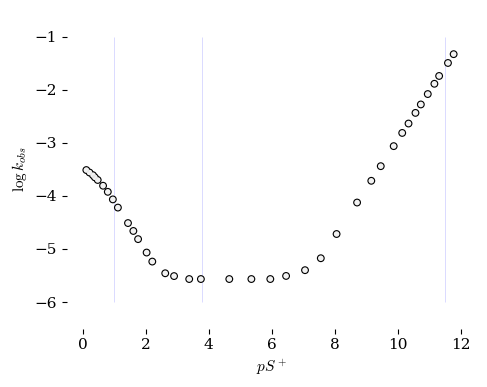

In [3]:
#####################################################
### Get series of data to plot from the dataframe ###
#####################################################

x = df.index
y = df["log_k"]


##################################################
### Setup a figure with two plots side-by-side ###
### and choose a stylesheet                    ###
##################################################

style_file = "tufte.mplstyle"
plt.style.use(github_location_styles + style_file)        

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,4))  
ax.margins(x=.07, y=.07, tight=True)      # add 7% empty space around outside of plot area   

############################
### Set labels and scale ###
############################

ax.set(
#    title="pH rate profilr",       
          ylabel=r"$\log{k_{obs}}$", 
          xlabel=r"$pS^+$",                
          xlim=[-.5,12.5],                  
          ylim=[-6.5,-0.5]
         )



plt.vlines([1,3.8,11.5],-6,-1, colors = "blue", alpha=0.2, linewidth = 0.5)


#########################################
### Plot the data and the line fit.   ###
#########################################

#ax.plot(x, y, color='black', zorder=1, linewidth=0.7)

#ax.scatter(x,y, s=64, color="white",  edgecolors = "none", zorder=2)
ax.scatter(x,y, s=32, color="black",  edgecolors = "none", zorder=2)
ax.scatter(x,y, s=16, color="white",  edgecolors = "none", alpha = 1, zorder=2)
ax.scatter(x,y, s=16, color="gray",  edgecolors = "none", alpha = 0.1, zorder=2)

if False:   # Flag to run or not. True = run this section, False = skip it
    linfit = linregress(x,y)
    fit = linfit.slope * x + linfit.intercept
    ax.plot(x, fit, color='black', zorder=1, linewidth=0.7)

    #####################################
    ### Print the line fit parameters ###
    #####################################
    print("anti (open circles)")
    print(f"slope  = {linfit.slope:0.2f}")
    print(f"intercept = {linfit.intercept:0.3f}")
    print(f"RSQ = {(linfit.rvalue**2):0.3f}")
    print(linfit)






fig.savefig("images/figure_3_plot.pdf")   # use this to save the figure in PDF format
plt.show()                 # output the combined plot plots

